In [1]:
import av
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import matplotlib as mpl
import matplotlib.pyplot as plt
import pims
import trackpy 
import trackpy as tp
from pims import ImageSequence
from Particledrop import Landing_Flashes

In [2]:
def trackpy_movie(movie, size, mmass):
    nf = movie.shape[0]
    f1 = trackpy.batch(movie[:,:,:], size, minmass=5, invert=False, processes='auto')
    t = trackpy.link(f1, 5, memory=0)
    
    t1 = trackpy.filter_stubs(t, 3)

    t2 = t1.rename(columns={'frame':'Frame'})
#     particles = t2['particle'].nunique()
#     print('Unique particles found:', + particles)
    
    # t2.groupby('Frame')['particle'].nunique().plot(kind='line')
    # plt.yticks(np.arange(0, particles+1, 5.0))
    # plt.xticks(np.arange(0, nf+1, 10.0))
    # plt.title('Number of landed particles over the series of frames')
    # plt.xlabel('Frame number')
    # plt.ylabel('Number of particles')
    # plt.grid()
    # plt.show()
    
    nparticles = []
    frames = np.arange(0,nf,1)

    for i in range(nf):
        temp = t2.loc[t2['Frame'] == i]
        nparticles.append(len(temp))

    plt.figure()
    plt.step(frames,nparticles)
    plt.yticks(np.arange(0, max(nparticles)+1, 2.0))
    plt.xticks(np.arange(0, nf+1, 5.0))
    plt.title('Stepfunction number of landed particles over the series of frames')
    plt.xlabel('Frame number')
    plt.ylabel('Number of particles')
    plt.grid()
    plt.show()
    
    t_hist = t2.drop_duplicates(subset=['particle'])
    plt.title('Found Mass Histogram')
    plt.hist(t_hist['mass'])
    plt.show()
    
#     plt.figure()
#     trackpy.annotate(t2[t2['Frame'] == nf-1], movie[nf-1]);
    
#     return t2, t_hist
    return

In [111]:
plt.rcParams['figure.figsize'] = (25, 25)

In [161]:
# video = r'C:\Users\brugg\Documents\MasterThesis\02062022\normal.avi'
video = r"E:\Ingmar\Ingmar\26072022\BFsetup\26072022\300nmlatex_1_to_20000_landed_overview2.avi"

In [ ]:
container = av.open(video)

for frame in container.decode(video=0):
    frame.to_image().save('FramesOverview2/frame%d.jpg' % frame.index)
    frame.to_image()

In [185]:
images = ImageSequence('FramesOverview2/frame*.jpg')
length = len(images)
print(length)

368


In [180]:
@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel


frames1 = gray(pims.open('FramesOverview/*.jpg'))
frames2 = gray(pims.open('FramesOverview2/*.jpg'))

In [187]:
frames1
nf1 = len(frames1)

(ImageSequence,) processed through proc_func. Original repr:
    <Frames>
    Source: C:\Users\brugg\PycharmProjects\epicsjukebox\Notebooks\Ingmar\FramesOverview\*.jpg
    Length: 526 frames
    Frame Shape: (1024, 1024, 3)
    Pixel Datatype: uint8

In [225]:
frames2
nf2 = len(frames2)

Frame([[  0,  10,  16, ...,  30,   0,   0],
       [ 15,  43,   7, ...,  57,  84,  34],
       [124,  12,   3, ...,   0,  75,   0],
       ...,
       [  0,  64,  43, ...,   0,   2,  65],
       [  8,  26,   0, ...,  71,   2,   8],
       [  0,   8,   0, ...,   3,   0, 117]], dtype=uint8)
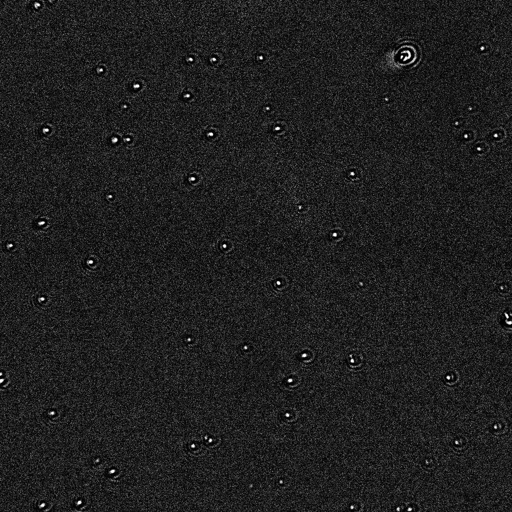

In [189]:
frames1[525]

In [229]:
overview1 = tp.locate(frames1[525], 7, minmass=700, separation=15)

In [230]:
overview1

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
8,9.170630,76.805965,1239.933146,1.869062,0.169447,72.551770,5782.0,0.039900,525
150,96.799924,963.548790,1237.592767,1.959499,0.070467,73.019846,5359.0,0.043285,525
175,113.130822,803.109463,1577.883970,1.765889,0.208651,119.359363,5076.0,0.045890,525
182,115.662991,521.479403,1443.078101,1.942491,0.060002,80.509060,5784.0,0.039885,525
183,118.067285,427.510109,1412.185090,1.946074,0.152215,80.040985,6066.0,0.037909,525
191,118.735925,381.944946,1504.864124,1.948162,0.156397,79.572909,6144.0,0.037397,525
218,139.807048,202.525830,1368.185952,1.889344,0.095422,86.125972,5439.0,0.042602,525
265,171.763361,275.747187,1331.207953,1.892877,0.023693,79.104833,5921.0,0.038900,525
297,191.498538,375.157946,1440.269646,1.952890,0.082313,78.636757,6113.0,0.037599,525
315,198.174771,772.238532,1020.405534,1.738263,0.268953,79.104833,3857.0,0.061950,525


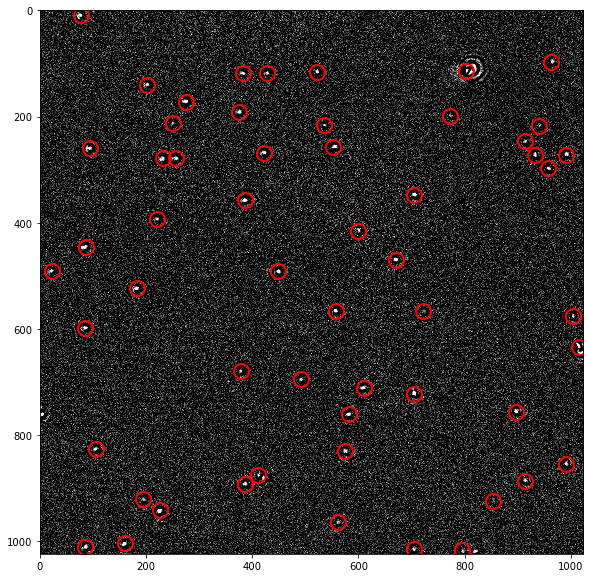

56


In [231]:
tp.annotate(overview1, frames1[525]);
print(len(overview1['mass']))

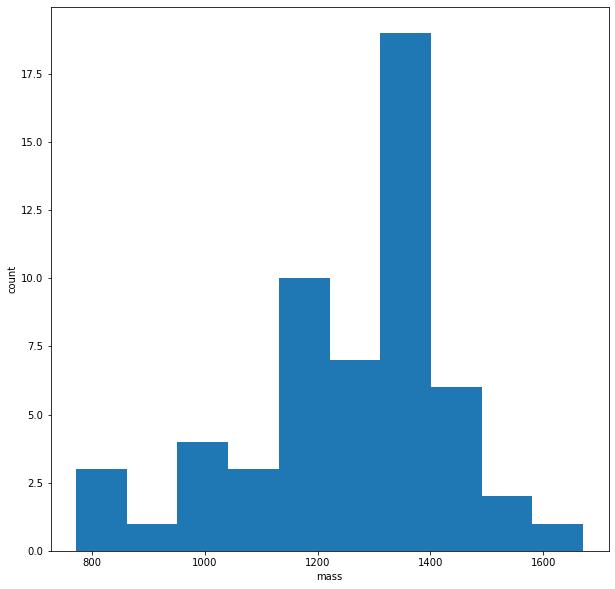

In [232]:
fig, ax = plt.subplots()
ax.hist(overview1['mass'], bins=10)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

Frame([[  7,   0,  85, ...,  41,  14,  59],
       [  2,   0,   6, ...,  35,   9,  80],
       [  2,   0,  93, ...,   3,   0,  36],
       ...,
       [  9,   0,   4, ...,   0,   0,  61],
       [  3,   3,  45, ...,   9, 134,  60],
       [ 90,   0,  11, ...,   0,  43,   0]], dtype=uint8)
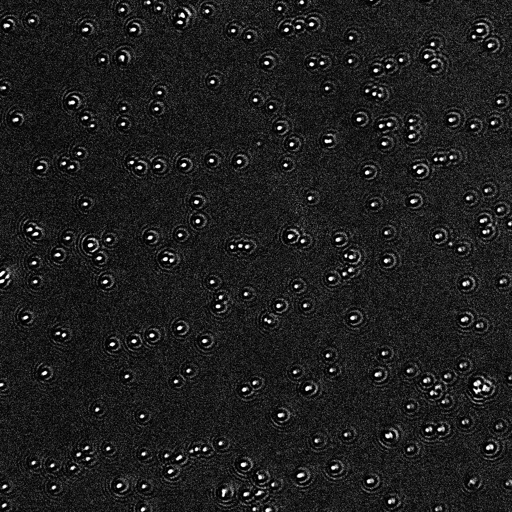

In [190]:
frames2[366]

In [211]:
overview2 = tp.locate(frames2[366], 7, minmass=700, separation=15)

In [212]:
overview2

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
2,4.810188,604.614312,1272.984532,1.971446,0.060222,75.267430,5993.0,0.017191,366
16,15.444376,559.594960,1256.001112,1.981630,0.146896,71.407562,5849.0,0.017626,366
21,18.225470,244.991127,1479.101494,2.050256,0.090907,72.951509,6732.0,0.015260,366
22,16.763382,318.457117,1269.124664,1.942842,0.060512,76.425390,5603.0,0.018422,366
25,21.325239,414.710778,1414.641695,2.032613,0.134540,76.425390,6251.0,0.016464,366
...,...,...,...,...,...,...,...,...,...
1456,989.798534,489.100414,1210.840654,1.933629,0.125314,75.267430,6071.0,0.016965,366
1457,990.727247,446.035714,1340.146239,1.777759,0.059307,95.338745,5669.0,0.018202,366
1477,1004.721649,778.429997,1160.662368,1.906703,0.120222,76.039404,5583.0,0.018490,366
1484,1011.742054,6.233496,1262.948875,1.932700,0.012701,70.635588,5940.0,0.017349,366


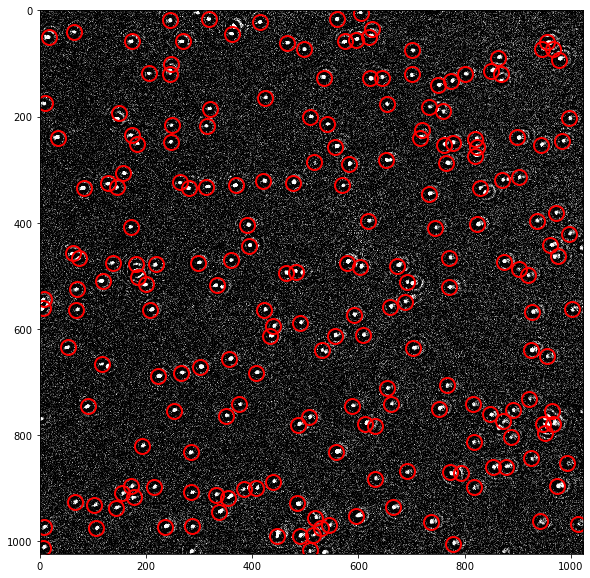

210


In [213]:
tp.annotate(overview2, frames2[366]);
print(len(overview2['mass']))

In [214]:
plt.rcParams['figure.figsize'] = (10, 10)

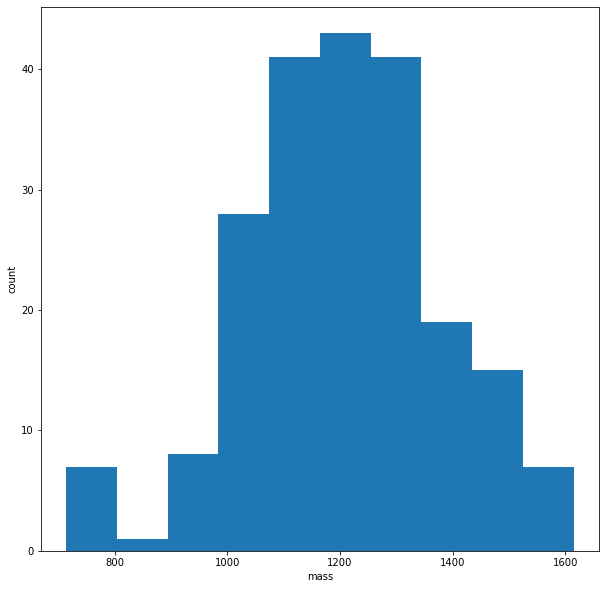

In [215]:
fig, ax = plt.subplots()
ax.hist(overview2['mass'], bins=10)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

In [216]:
# f = tp.batch(frames[0:50], 5, minmass=56)
f = tp.batch(frames2[340:366], 7, minmass=700, maxsize=2.2, noise_size=1.2, separation=15)

In [217]:
tp.quiet()  # Turn off progress reports for best performance
t = tp.link(f, 8, memory=1, )

In [218]:
t1 = tp.filter_stubs(t, 25)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 597
After: 141


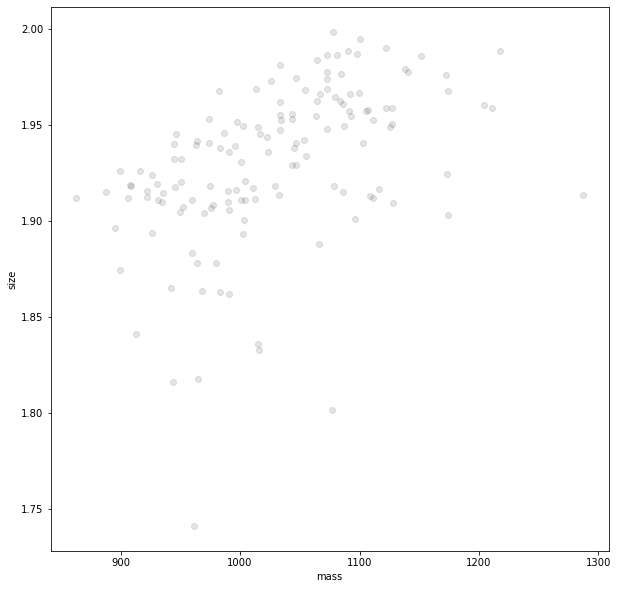

In [219]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

In [220]:
t2 = t1[((t1['mass'] > 750) & (t1['size'] < 2.6) &
         (t1['ecc'] < 0.5))]

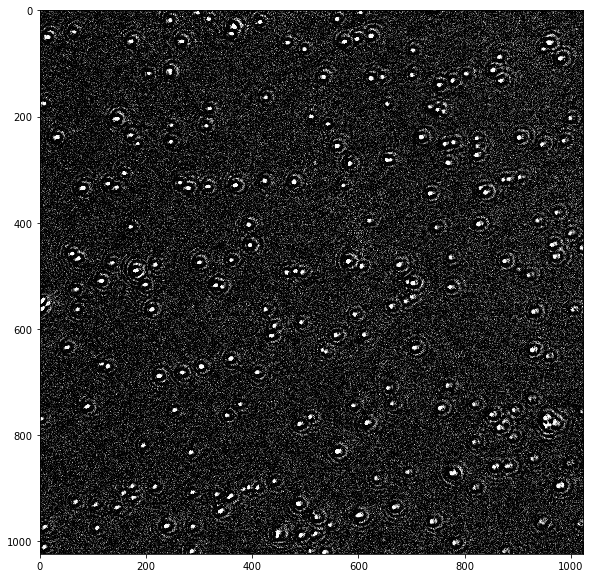

In [223]:
plt.figure()
tp.annotate(t2[t2['frame'] == 366], frames2[366]);

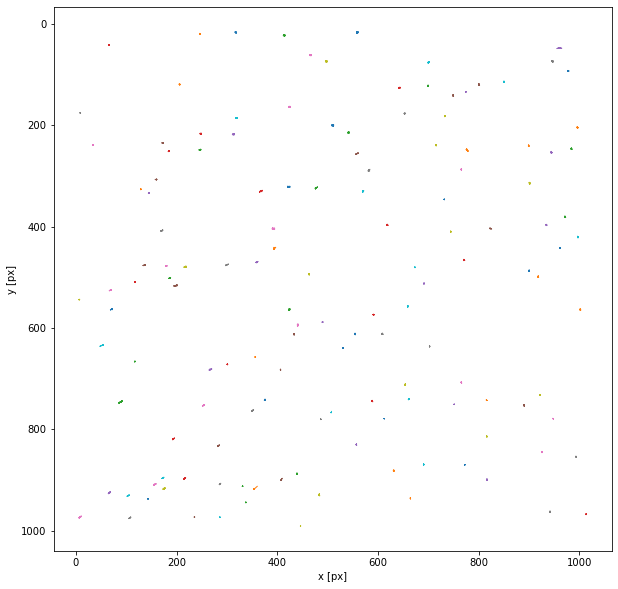

In [224]:
plt.figure()
tp.plot_traj(t2);

In [226]:
startframe = 0
endframe = nf2
startframe2 = 1  # +1 for accounting for the moving average
endframe2 = endframe-startframe

bgcorrected2 = frames2[startframe2:endframe2] - np.mean([frames2[startframe2-1:endframe2-1]])

print(bgcorrected2.shape)  # to check the shape of the array(frames,x,y)

(367, 1024, 1024)


In [227]:
h = tp.batch(bgcorrected2[:], 7)

In [228]:
h

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,3.274436,7.239348,196.385555,1.286132,0.262276,31.992634,-130.085344,0.227319,0
1,2.907514,63.473988,127.724440,1.449204,0.400559,21.656552,-61.085344,0.204697,0
2,3.056881,125.034862,134.122967,1.328585,0.420015,26.824593,-168.085344,0.242051,0
3,2.442046,145.751399,307.867581,1.497400,0.188032,43.805299,342.914656,0.129336,0
4,3.051802,264.453829,218.534302,1.732376,0.265280,23.625330,43.914656,0.177775,0
...,...,...,...,...,...,...,...,...,...
2068587,1020.041176,246.082353,130.576893,1.625170,0.274262,18.818435,-245.085344,0.095728,366
2068588,1019.866242,284.087580,1205.916009,1.966681,0.094518,71.817291,5404.914656,0.010058,366
2068589,1019.490196,599.088235,117.519203,1.663723,0.314159,14.977938,-188.085344,0.088153,366
2068590,1019.891821,696.382586,145.554830,1.502856,0.190430,19.970584,-157.085344,0.084515,366
